# **Heures supplémentaires mensuelles : Industrie manufacturière pour le Japon**

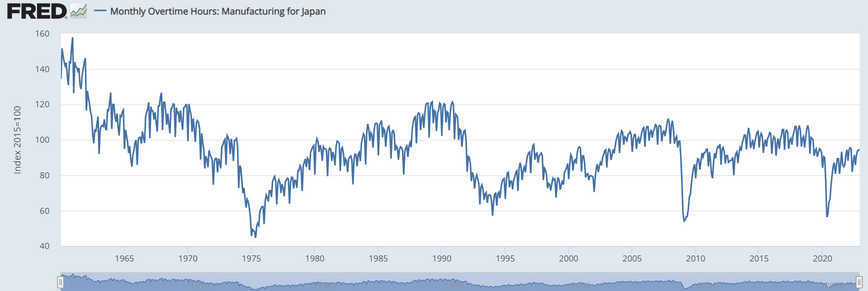

Le dataset s'agit d'une série d'observations de fréquence mensuelle qui s'étale du mois Janvier 2002 au mois de Décembre 2021.

# Etude graphique des données  


## Chargement des données

In [82]:
install.packages("fredr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(fredr)
fredr_set_key(FRED_API_KEY)

In [84]:
data<-fredr(series_id = "HOOVMN03JPM661N",

observation_start = as.Date("2002-01-01"),
observation_end = as.Date("2021-12-31"))

In [85]:
str(data)

tibble [240 × 5] (S3: tbl_df/tbl/data.frame)
 $ date          : Date[1:240], format: "2002-01-01" "2002-02-01" ...
 $ series_id     : chr [1:240] "HOOVMN03JPM661N" "HOOVMN03JPM661N" "HOOVMN03JPM661N" "HOOVMN03JPM661N" ...
 $ value         : num [1:240] 70.5 78.9 83.6 86.3 81.7 ...
 $ realtime_start: Date[1:240], format: "2023-04-27" "2023-04-27" ...
 $ realtime_end  : Date[1:240], format: "2023-04-27" "2023-04-27" ...


In [86]:
data=data$value
data

[1]  70.49867  78.87324  83.59345  86.25809  81.69014  85.11610  87.17168
  [8]  85.49676  89.98858  91.58736  93.79520  94.32813  84.27864  92.50095
 [15]  94.70879  94.09973  88.61820  91.28283  94.63266  92.42482  96.76437
 [22] 100.19033 102.39817 103.31176  92.50095 101.71298 105.06281 103.99695
 [29]  97.22116 101.71298 101.18005  98.89608 102.93110 103.38789 104.60601
 [36] 102.93110  93.11001 100.57099 102.93110 102.93110  94.86106  99.96193
 [43] 101.18005  97.83022 100.57099 103.99695 106.28093 106.88999  96.07918
 [50] 105.67187 107.42292 107.42292  99.50514 103.99695 105.67187 101.18005
 [57] 104.60601 106.28093 108.56490 108.03198  97.22116 107.42292 108.10811
 [64] 107.49905  99.12448 103.61629 105.36734 102.01751 105.36734 109.47849
 [71] 111.91473 109.63076  97.67796 108.03198 110.77274 105.82413  97.83022
 [78] 100.72326 101.86525  95.62238  99.12448  99.20061  89.98858  76.28474
 [85]  58.01294  54.13019  54.66311  56.49029  56.56643  60.60145  67.52950
 [92]  69.28055  75.59954  80.31976  84.35478  86.18196  78.26418  86.33422
 [99]  89.30339  88.77046  83.13666  87.78074  92.50095  90.29311  92.72935
[106]  92.80548  94.55653  94.70879  84.96384  93.11001  88.54206  80.47202
[113]  78.26418  87.62847  92.42482  89.60792  94.32813  96.23144  95.69852
[120]  97.60183  85.87743  94.93719  95.69852  93.33841  86.56262  91.13057
[127]  91.13057  87.24781  87.78074  88.38980  88.46593  90.14085  79.93909
[134]  89.68405  91.96802  93.11001  86.86715  92.65322  95.62238  93.87134
[141]  97.98249 100.26646 102.62657 102.62657  94.55653 102.70270 106.73772
[148] 103.31176  95.39399  97.67796 100.03807  94.78493  98.97221 101.86525
[155] 104.14922 104.75828  95.62238 101.86525 103.54016 101.86525  92.65322
[162]  97.90636 100.11420  96.15531 100.72326 101.86525 104.14922 103.54016
[169]  92.12029  99.58127 101.86525 100.72326  90.97830  97.90636 100.72326
[176]  94.93719 100.11420 102.39817 105.82413 105.82413  94.40426 104.68215
[183] 105.29121 104.14922  94.93719  99.58127 100.72326  97.29730 102.39817
[190] 104.68215 107.49905 107.49905  96.15531 105.82413 108.10811 105.29121
[197]  96.15531 100.72326 101.86525  95.62238 101.25619 105.82413 108.10811
[204] 105.29121  92.12029 101.25619 100.72326 100.11420  90.97830  93.79520
[211]  94.93719  90.44537  92.65322  94.93719  94.40426  92.65322  84.12638
[218]  90.44537  89.83632  76.20860  56.33803  58.01294  64.86486  66.53978
[225]  74.53369  80.16749  85.26837  87.01941  80.77655  85.26837  89.30339
[232]  89.30339  80.77655  86.41035  93.26228  85.87743  84.73544  85.87743
[239]  91.51123  94.40426

In [87]:
# en indiquant la période de l'étude via la préision de start et freq (on peut
# aussi préciser la date de la fin : end).
data.ts<-ts(data, start = c(2002, 1),end=c(2021, 12),freq = 12)

## Exploration graphique des données

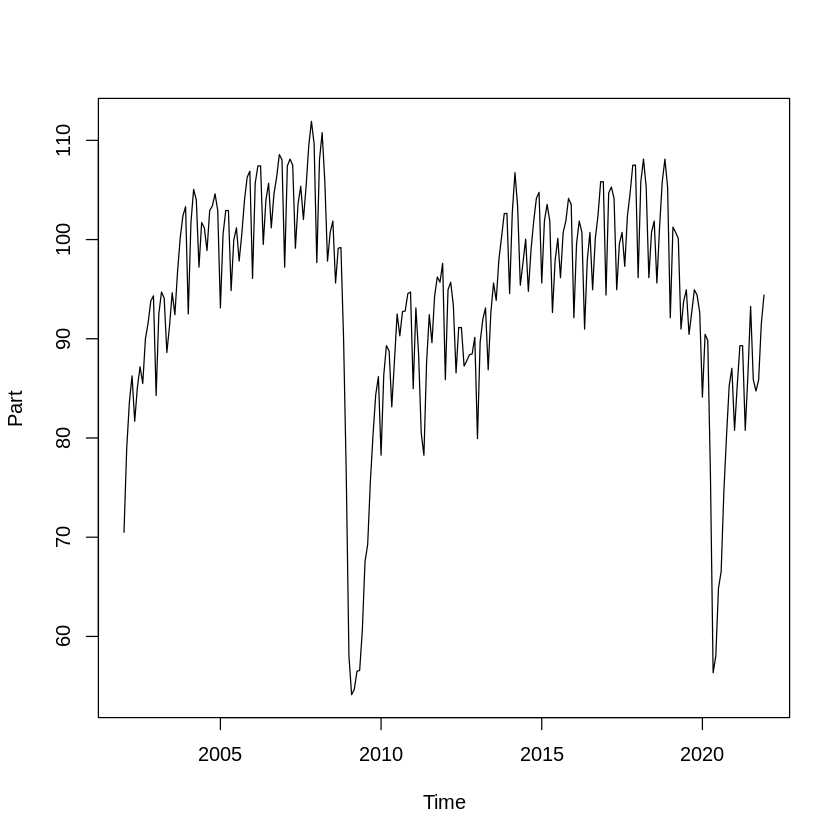

In [88]:
Part=window(data.ts,start=c(2002, 1),end=c(2021, 12))
plot(Part)

A travers la représentation graphique des données à étudier, on remarque l'absence d'une tendance et la presence d'une saisonnalité presque chaque 10ans.

Pour s'assurer de ce qu'on a observé, on examine la fonction d'autocorrelation `acf`.

ANALYSE DES POINTS CRITIQUES 


on observe une chute dans la réduction des heures de travail entre octobre 2008 et Décembre 2009 due à deux facteurs : 
- octobre 2008 :la crise financière mondiale

- Décembre 2019 : COVID19

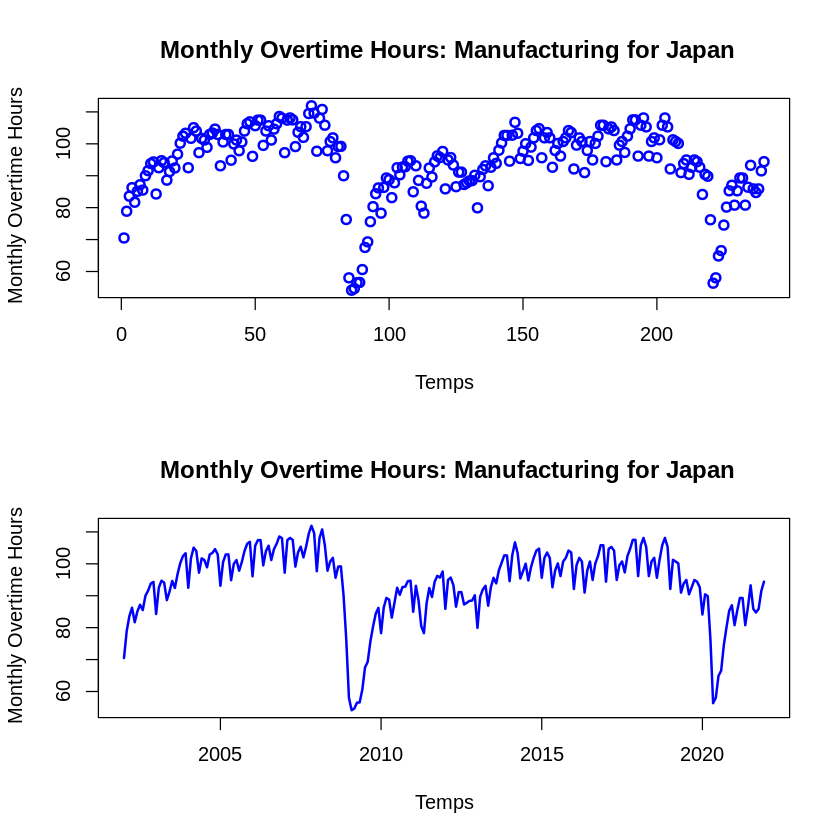

In [89]:
par(mfrow=c(2,1))
#plot(data)
plot(data, xlab="Temps", ylab=" Monthly Overtime Hours",
     main=" Monthly Overtime Hours: Manufacturing for Japan",
     col="blue",lwd=2)
#plot(data.ts)
plot(data.ts, xlab="Temps", ylab=" Monthly Overtime Hours",
     main=" Monthly Overtime Hours: Manufacturing for Japan",
     col="blue",lwd=2)

In [90]:
str(data)

 num [1:240] 70.5 78.9 83.6 86.3 81.7 ...


In [91]:
class(data)

[1] "numeric"

In [92]:
class(data.ts)

[1] "ts"

## ACF

La fonction d'autocorrélation (ACF) est un outil statistique utilisé pour analyser la corrélation entre une série temporelle et ses propres observations passées. Plus précisément, elle mesure la corrélation linéaire entre une série temporelle et les versions retardées de cette série temporelle à différents intervalles de temps.



---



---



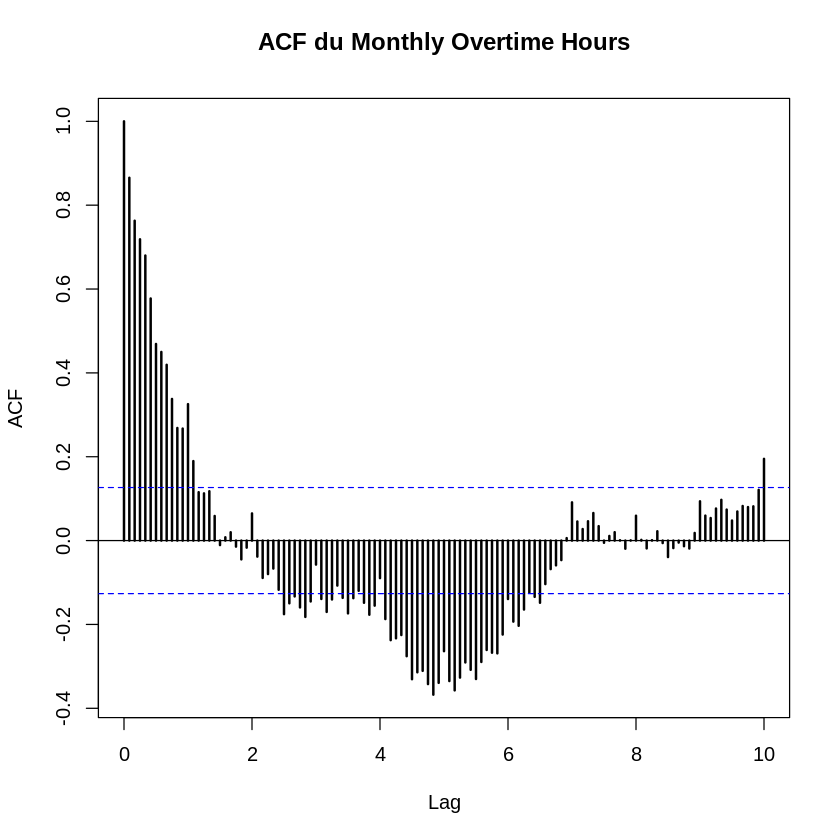

In [93]:
# Autocorrélation
# Fonction d'auto-corrélation
acf(data.ts,lag=120,main="ACF du Monthly Overtime Hours",lwd=2)
# on obtient un corrélogramme
#Les batons mesurent la liaison linéaire entre la série et la série décalée 
# des valeurs positive pour une liaison positive
# des valeurs négatives pour une liaison négative
# ligne en bleu pour la significativité de la liaison
# lag: nombre des décalages
# lag = 120 a été choisi car il correspond à une période saisonnière de 10 ans (120 mois),les données sont mensuelles

 L'acf est d'une **décroissance** remarquable

on va tester encore avec La sortie de la fonction `decompose` par rapport au trend (via une moyenne mobile)

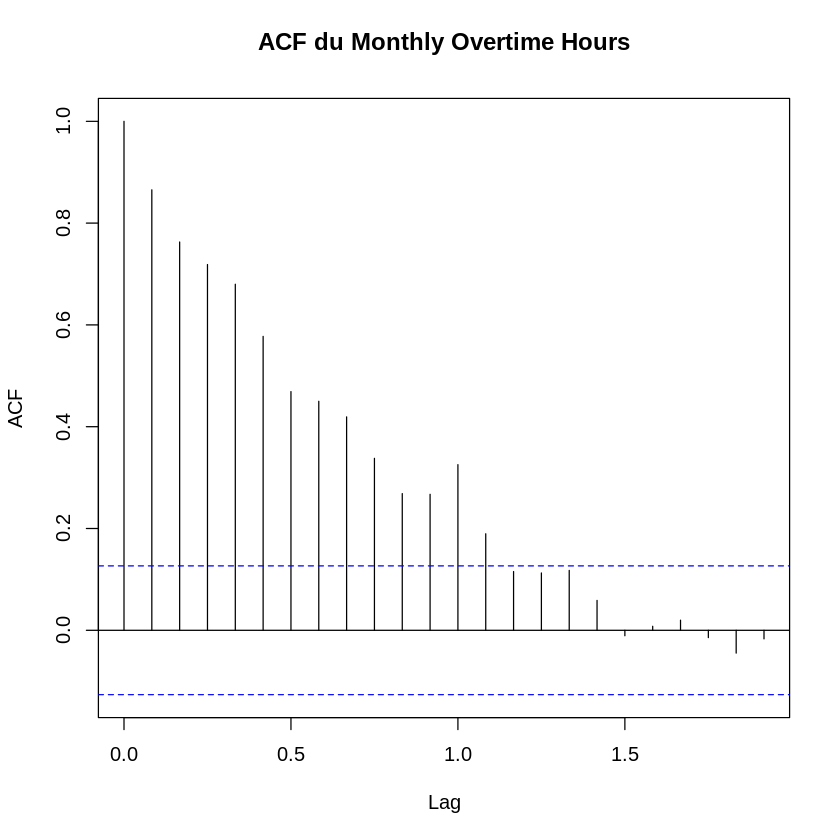

In [94]:
acf(data.ts,main="ACF du Monthly Overtime Hours") #par defaut 24
##Liaison linéaire forte positive entre la série et la série décalée sauf à partir de 14



---



---



# Modélisation des données  
On considère que notre ST s'écrit sous la forme suivante :  
$$y_t=f(t;\Lambda)+\varepsilon_t, \quad t\in T$$
avec :  
- $f(t;\Lambda)$ désigne la composante déterministe avec un vecteur de aparamètres $\Lambda$  
- $\varepsilon_t$ désigne la composante stochastique  

## Modélisation de la composante déterministe  
Dans cet exemple, la composante déterministe inclut la composante tendance et saisonnière.

## Décomposition

### Detection des indicateurs majeurs 
on va tracer le résulat de la décomposition additive 

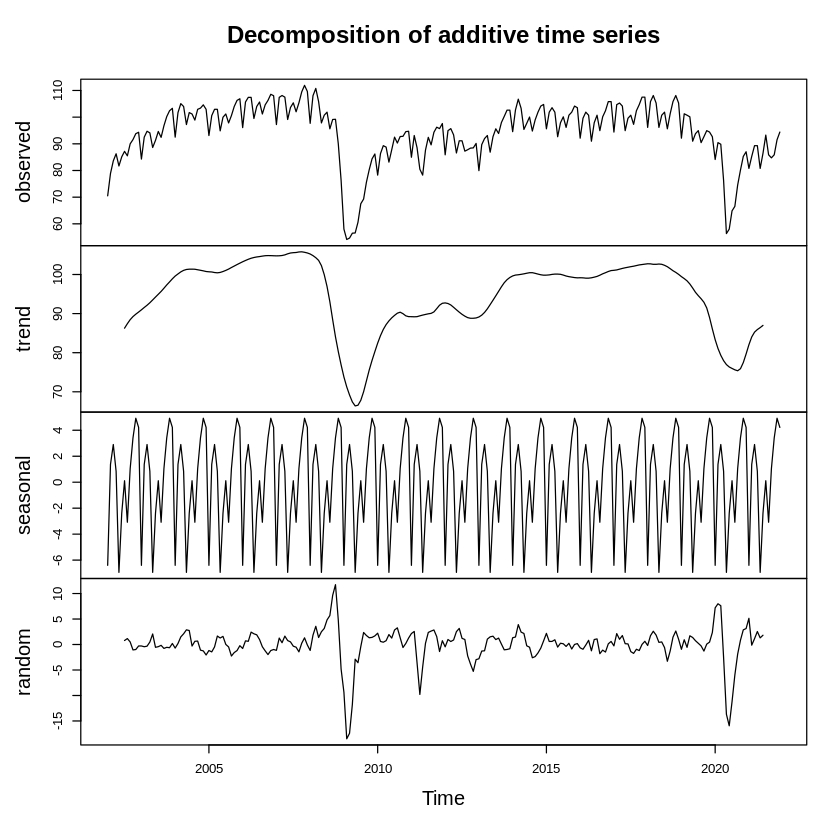

In [95]:
# décomposition en modèle additif
data_Ad=decompose(data.ts,"additive")
plot(data_Ad)
# composante tendance
T_VA=data_Ad$trend
# composante saisonnière
S_VA=data_Ad$seasonal
# composante résiduelle
R_VA=data_Ad$random
# Prévision
data_PrA=T_VA+S_VA

✅ On observe:
- une saisonnalité annuelle 
- Pas de tendance(la tendance est non lineanire)



---



on va tracer le résulat de la décomposition multiplicative

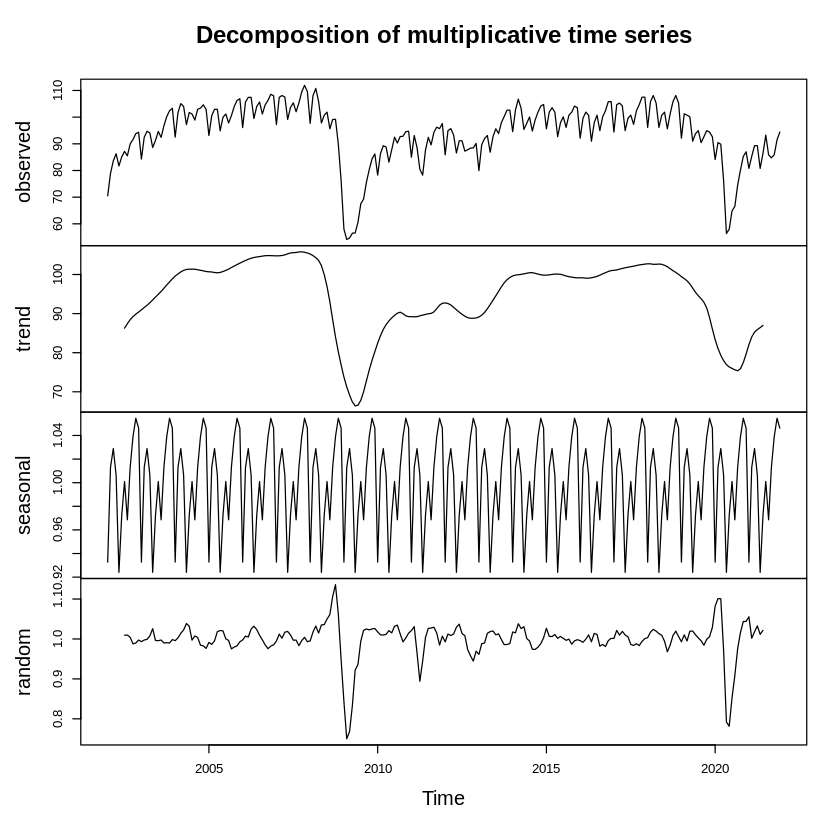

In [96]:
data_Mul=decompose(data.ts,"multiplicative")
plot(data_Mul)
# composante tendance
T_VM=data_Mul$trend
# composante saisonnière
S_VM=data_Mul$seasonal
# composante résiduelle
R_VM=data_Mul$random
# Prévision
data_PrM=T_VM*S_VM

✅ On observe:
- une saisonnalité annuelle 
- Pas de tendance(la tendance est non lineanire)

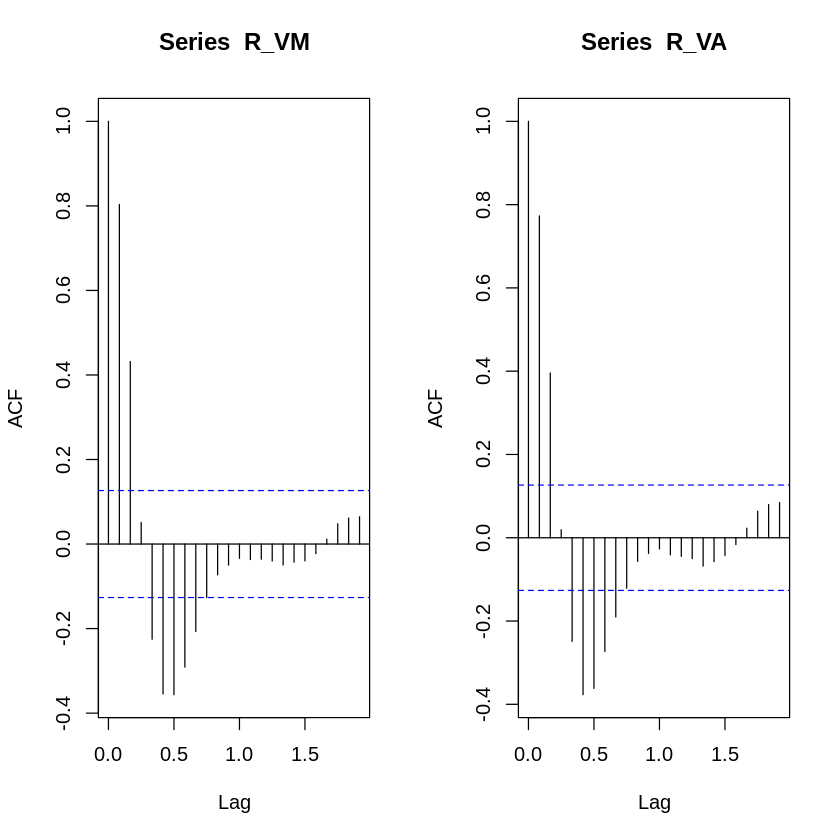

In [97]:
#Résidus
par(mfrow=c(1,2))
acf(R_VM,na.action=na.pass)
acf(R_VA,na.action=na.pass)

- corellation entre les résidus et les résidus décalées

- Il existe des informations dans la série autre que la tendance et la composante saisonnière 

- En comparant les deux résidus des deux modèles on remarque que l'auto-corrélation dans le modèle multiplicatif est moins importante, les résidus présentent moins d'information



✅ le modèle multiplicatif modélise mieux  la série

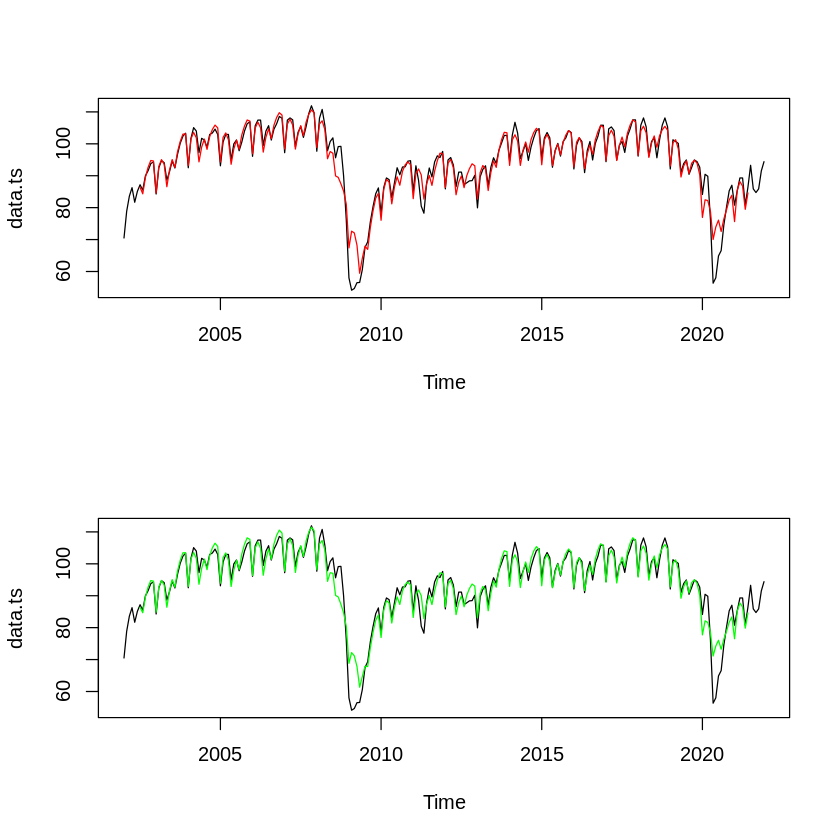

In [98]:
# Prévision
par(mfrow=c(2,1))
plot(data.ts)
lines(data_PrA,col="red")
plot(data.ts)
lines(data_PrM,col="green")

Tendance non linéaire croissante avec un changement structurelle (chute en 2008 et 2019) et reprise de même comportement

# Ajustement d'une série temporelle

 Avant de simuler le modéle de regression linéaire, il est clair que ce dernier ne sera pas le modéle adequat dans notre cas, vu que notre série n'est pas linéaire

In [99]:
# simulation de la composante saisonnière avec seasonnaldummy
install.packages("forecast")
library(forecast)
t <- seq_along(data.ts)
MLS3 <- lm(data.ts ~ t + seasonaldummy(data.ts))
summary(MLS3)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Call:
lm(formula = data.ts ~ t + seasonaldummy(data.ts))

Residuals:
    Min      1Q  Median      3Q     Max 
-42.720  -4.619   3.695   7.482  13.199 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               100.67603    2.73138  36.859  < 2e-16 ***
t                          -0.01582    0.01009  -1.568 0.118206    
seasonaldummy(data.ts)Jan -11.44161    3.42095  -3.345 0.000964 ***
seasonaldummy(data.ts)Feb  -3.61079    3.42064  -1.056 0.292278    
seasonaldummy(data.ts)Mar  -1.91625    3.42035  -0.560 0.575862    
seasonaldummy(data.ts)Apr  -3.75045    3.42010  -1.097 0.273982    
seasonaldummy(data.ts)May -11.37072    3.41988  -3.325 0.001031 ** 
seasonaldummy(data.ts)Jun  -6.86689    3.41969  -2.008 0.045823 *  
seasonaldummy(data.ts)Jul  -4.12173    3.41952  -1.205 0.229323    
seasonaldummy(data.ts)Aug  -7.47477    3.41939  -2.186 0.029838 *  
seasonaldummy(data.ts)Sep  -3.57239    3.41928  -1.045 0.297237    
seasonaldummy(dat

 * L'intercept est la valeur attendue de la série chronologique lorsque t=0, la variable "t" est la pente de la tendance linéaire, et chaque variable "seasonaldummy" représente la différence de la moyenne entre le mois en question et la moyenne globale de la série chronologique.

* La valeur R carré multiple de 0,1232 indique que le modèle ne peut expliquer que 12,32% de la variance de la série chronologique. Cela suggère que le modèle peut ne pas être très efficace pour expliquer la série chronologique, et que d'autres variables explicatives pourraient être nécessaires pour améliorer la performance du modèle.

In [100]:
AIC(MLS3)

[1] 1838.454

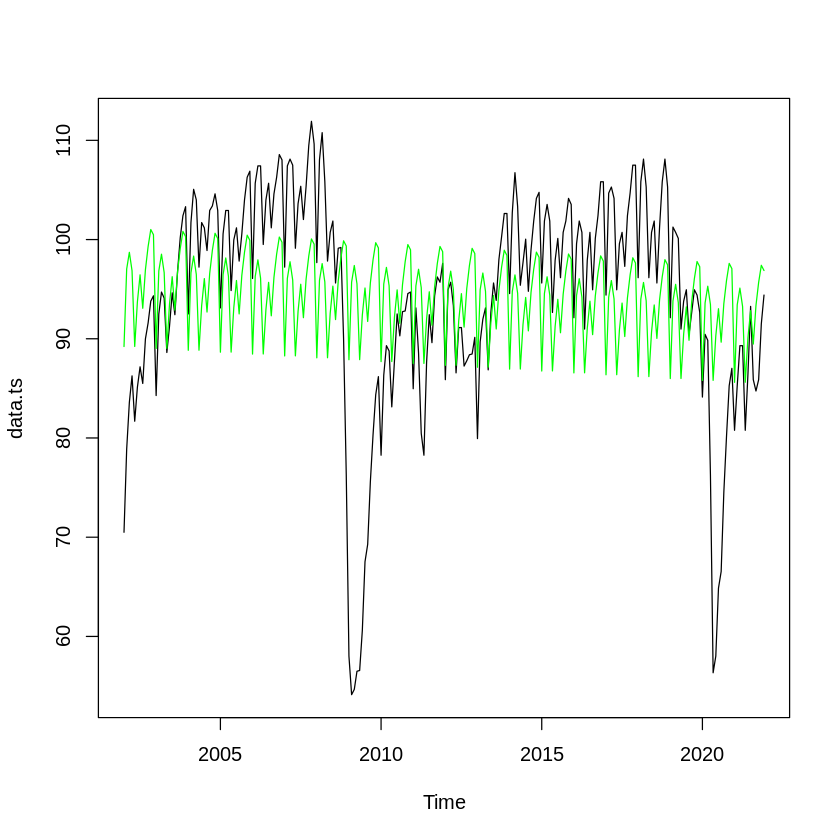

In [101]:
plot(data.ts)
points(time(data.ts),fitted(MLS3),type="l",col="green")


In [102]:
install.packages("strucchange")
library(strucchange)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



La fonction breakpoints() est utilisée pour effectuer une analyse de rupture de structure (changement de structure) dans une série temporelle. Elle identifie les points de rupture dans une série où la structure de la série change

 La fonction est appliquée à la série temporelle transformée en logarithme log(data.ts), en fonction de l'indice temporel t, pour identifier les points de rupture dans les tendances de la série temporelle.

En prenant le logarithme de la série temporelle, on réduit la magnitude des valeurs de la série, ce qui peut aider à stabiliser la variance des résidus. Cela peut faciliter l'interprétation des diagnostics et améliorer la qualité des prévisions.

In [103]:
Breakpoints=breakpoints(log(data.ts)~t)
Breakpoints


	 Optimal 5-segment partition: 

Call:
breakpoints.formula(formula = log(data.ts) ~ t)

Breakpoints at observation number:
36 83 120 204 

Corresponding to breakdates:
2004(12) 2008(11) 2011(12) 2018(12) 

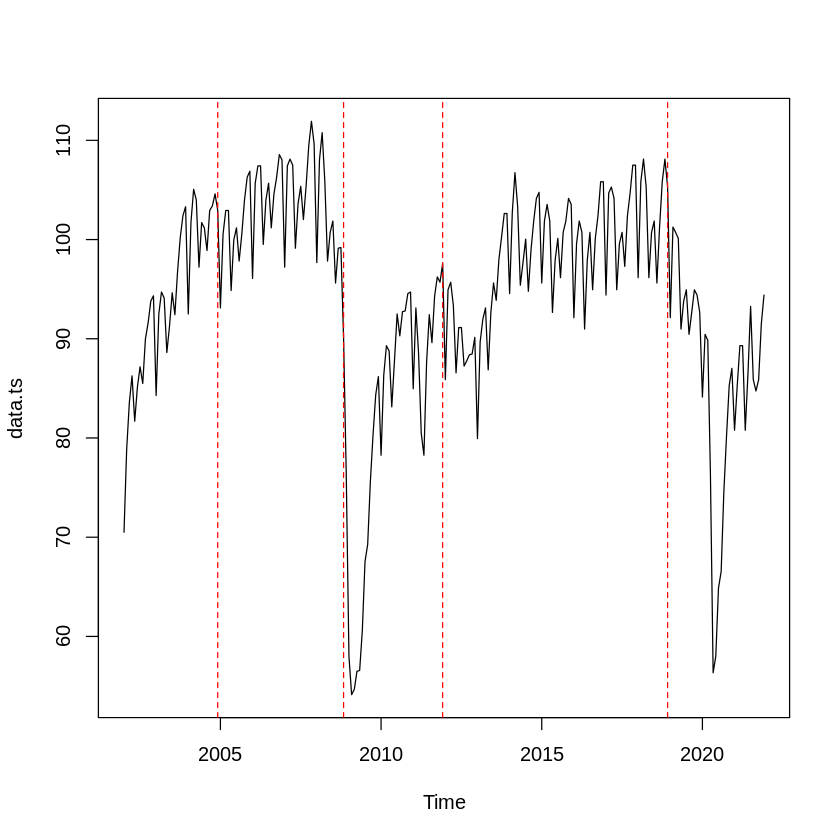

In [104]:
plot(data.ts)
lines(Breakpoints,col="red")

In [105]:
M=lm(log(data.ts)~breakfactor(Breakpoints)*t)
summary(M)


Call:
lm(formula = log(data.ts) ~ breakfactor(Breakpoints) * t)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.42001 -0.03580  0.01336  0.04506  0.18033 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         4.395359   0.027156 161.853  < 2e-16 ***
breakfactor(Breakpoints)segment2    0.225527   0.059349   3.800 0.000185 ***
breakfactor(Breakpoints)segment3   -1.345113   0.128872 -10.438  < 2e-16 ***
breakfactor(Breakpoints)segment4   -0.084128   0.064933  -1.296 0.196409    
breakfactor(Breakpoints)segment5    0.738830   0.286385   2.580 0.010507 *  
t                                   0.007709   0.001280   6.023 6.72e-09 ***
breakfactor(Breakpoints)segment2:t -0.007505   0.001541  -4.871 2.07e-06 ***
breakfactor(Breakpoints)segment3:t  0.005432   0.001774   3.062 0.002459 ** 
breakfactor(Breakpoints)segment4:t -0.006017   0.001329  -4.526 9.64e-06 ***
breakfactor(Breakpoints)segment5:t -0.010799  

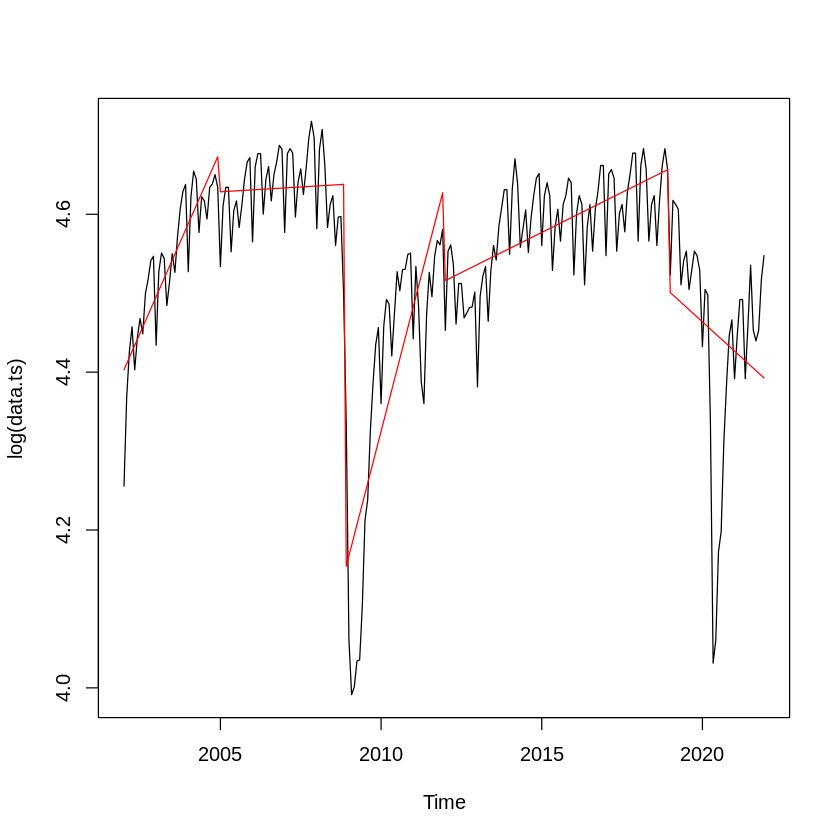

In [106]:
fitted.ts=ts(fitted(M),start=c(2002,1),freq =12)
plot(log(data.ts))
lines(fitted.ts,col="red")

⛳Aprés avoir essayer plusieurs modéles, les deux qui nous ont donné les meilleurs R-squared c'est Breakpoints avec R-squared ~ 66% et celui avec 'cos et sin' comme paramétre, avec R-squared~60%

#  **Stationnalité et Modélisation ARIMA**

### Test de stasionnarité  
Pour pouvoir modéliser les résidus par un modèle ARMA, il faut s'assurer de leur stationnarité. Pour ce faire, on utilisera le test de Augmented Dickey Fuller `adf.test()` sous le package  `tseries`. Si :  

 1. La stationnarité est assurée alors :  
     a. Si les résidus correspondent à un bruit blanc, c'est gagné! ***Le modèle est parfait !***  
     b. Si les résidus ne correspondent pas à un bruit blanc, on passe à la modélisation par un modèle ARMA.  
 
2. La stationnarité n'est pas assurée alors on applique des différentiations autant de fois que nécessaire pour stationnariser la série et revenir au premier point.

In [107]:
install.packages('tseries') 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [108]:
#Modéle AR (AutoRegressive)
library(tseries)
adf.test(data.ts) #pvalue=0.1211>0.05: On accepte H0 : la série n'est pas stationnaire


	Augmented Dickey-Fuller Test

data:  data.ts
Dickey-Fuller = -3.0813, Lag order = 6, p-value = 0.1211
alternative hypothesis: stationary


In [109]:
data.ts_diff=diff(data.ts) 
adf.test(data.ts_diff) #Pvalues=0.01<0.05 : on accepte H1 : La série est stationnaire

Warning message in adf.test(data.ts_diff):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  data.ts_diff
Dickey-Fuller = -6.7837, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


⛳ En comparant la p_value issue du test de Dickey-Fuller on trouve qu'elle inferieur à 0.05 donc `La stationnarité est assurée et acceptée` : l'hypothèse de stationnarité. Donc On passe à créer le modéle ARIMA puis tester Si les résidus correspondent à un bruit blanc.

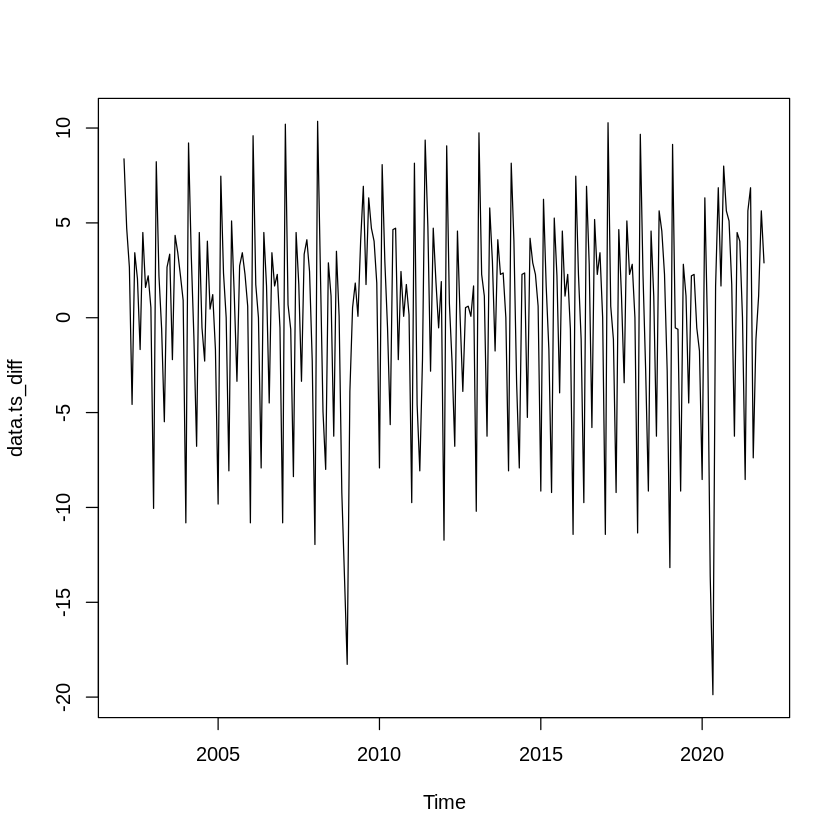

In [110]:
plot(data.ts_diff)

On voit bien que c'est difficile de déterminer $p$ et $q$ à partir des tracés de l'acf et la pacf. On pourra utilisé la fonction `auto.arima()`du package `forecast`.

In [111]:
ARMA1=auto.arima(data.ts_diff)
ARMA1

Series: data.ts_diff 
ARIMA(3,0,0)(0,1,1)[12] 

Coefficients:
         ar1     ar2      ar3     sma1
      0.5020  0.0029  -0.0694  -0.8544
s.e.  0.0661  0.0747   0.0669   0.0579

sigma^2 = 6.196:  log likelihood = -535.09
AIC=1080.18   AICc=1080.45   BIC=1097.31


(3,0,0) : Cela signifie que le modèle comporte une composante autorégressive (AR) d'ordre 3 et qu'il n'y a pas de composante de moyenne mobile (MA).
(0,1,1) : Cela indique qu'il y a une différenciation temporelle d'ordre 1, une composante de moyenne mobile (MA) d'ordre 1 et qu'il n'y a pas de composante autorégressive (AR) pour les données différenciées.
[12] : Cela indique que la série est saisonnière avec une période de 12 mois.

Le résultat de la fonction `auto.arima()` nous donne que le bon modèle à considérer est un ARMA(3,0,0)(0,1,1). Donnons ce modèle.

In [112]:
model=arima(data.ts_diff, order = c(3, 0, 0),seasonal = list(order = c(0,1,1), period = 12))

❎ On voit que la p-value du composante aléatoire du modèle ARMA = 0.9956 >0.05 donc il sagit d' un bruit blanc. On a pas une autocorrélation saisonnière.

In [113]:
summary(model)


Call:
arima(x = data.ts_diff, order = c(3, 0, 0), seasonal = list(order = c(0, 1, 
    1), period = 12))

Coefficients:
         ar1     ar2      ar3     sma1
      0.5020  0.0029  -0.0694  -0.8544
s.e.  0.0661  0.0747   0.0669   0.0579

sigma^2 estimated as 6.087:  log likelihood = -535.09,  aic = 1080.18

Training set error measures:
                     ME     RMSE      MAE MPE MAPE      MASE          ACF1
Training set -0.1098463 2.404493 1.667119 NaN  Inf 0.2542258 -0.0003597795

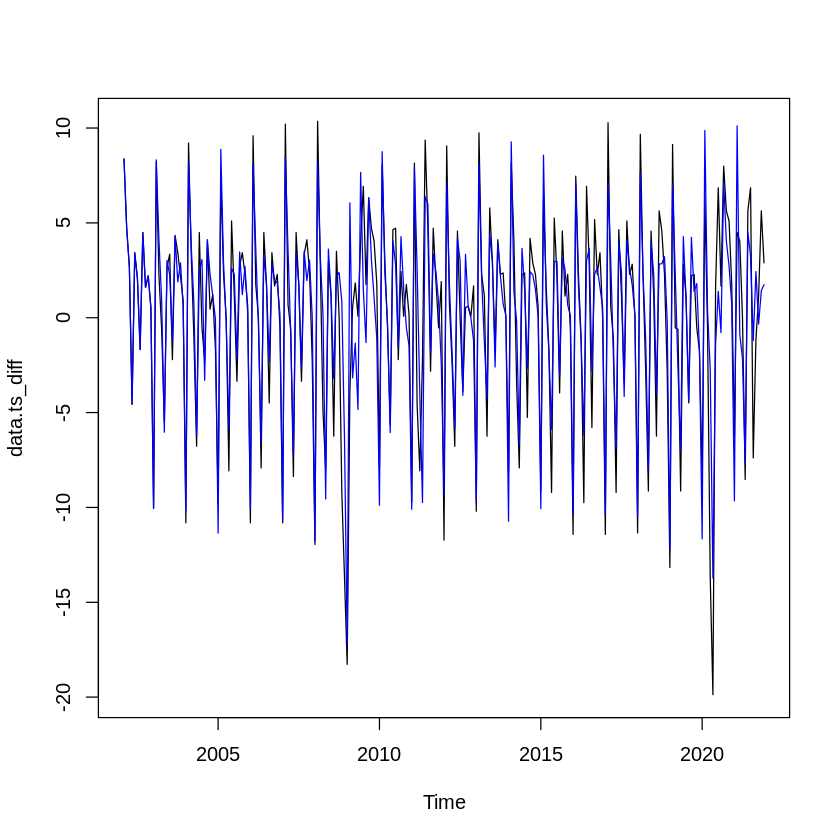

In [114]:
plot(data.ts_diff)
points(time(data.ts_diff),fitted(model),type="l",col="blue")

### Modèle ARMA pour la composante résiduelle différenciée  
Pour avoir une idée sur l'ordre $p$ du modèle AR et l'ordre $q$ de celui de MA, on trace l'acf et la pacf des données résiduelles différenciées.

In [115]:
adf.test(model$residuals)

Warning message in adf.test(model$residuals):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  model$residuals
Dickey-Fuller = -5.5463, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


### Test de blancheur : `Box.test()`
On teste si les residus de la serie stationnaire sont bien un bruit blanc ou pas. Pour ce faire:  
  
Appliquer le test de Box-Pierce via la commande `Box.test()`.

In [116]:
Box.test(model$residuals)


	Box-Pierce test

data:  model$residuals
X-squared = 3.0936e-05, df = 1, p-value = 0.9956


p-value = 0.9956 > 0.05

Le bruit est blanc alors pas besoin de faire un modéle ARIMA pour les résidus


	Ljung-Box test

data:  Residuals from ARIMA(3,0,0)(0,1,1)[12]
Q* = 21.951, df = 20, p-value = 0.3432

Model df: 4.   Total lags used: 24



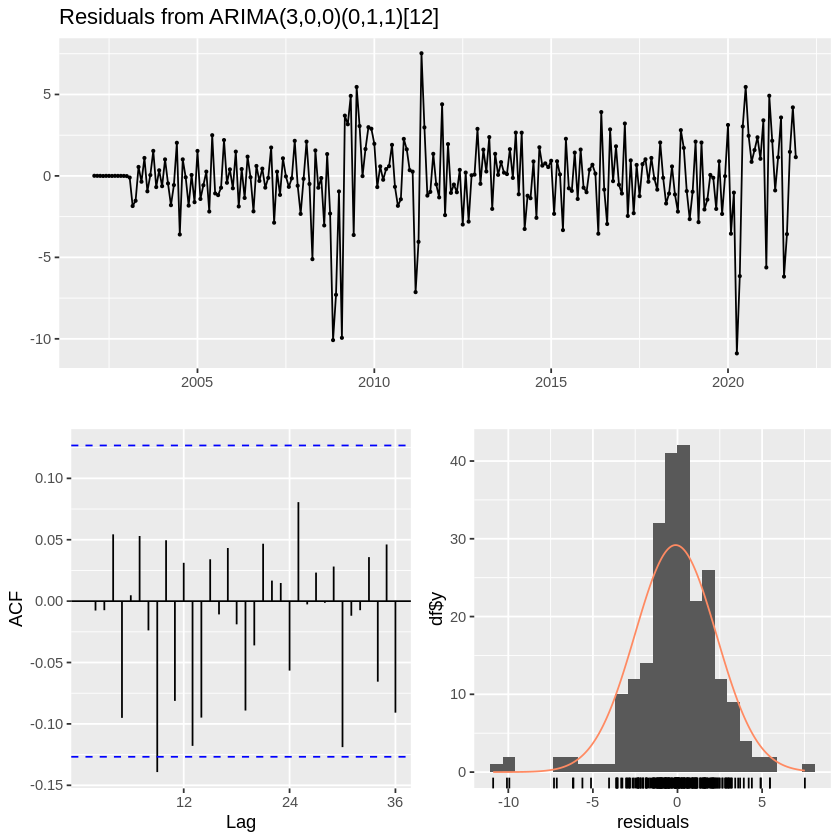

In [117]:
checkresiduals(model)